## Final Assignment - Python Text Analysis
### Aftab Alam

## Introduction
As part of the final assignment, I will be doing sentiment analysis on first 3 seasons of the **Rick and Morty** show. I have taken the data from [Kaggle](https://www.kaggle.com/datasets/andradaolteanu/rickmorty-scripts). The data was already cleaned by the user who uploaded it to Kaggle. The dataset has following columns:

1. index: just the index of the row
2. season no: The season number of the dialogue
3. episode no: The episode number of the dialogue
4. episode name: The name of the episode
5. name: the character name
6. line: the dialogue of the character

The motivation behind this dataset comes from my fondness of the show. It is a sci-fi cartoon show that primarily revolves around an old drunk cynical scientist (Rick) and his good-hearted grandson (Morty) who travel together across the multiverse for adventures. The show is a comic and delivers the viewvers with dark comedy and a plethora of emotions. 

The main characters of the show are Rick, Morty, Summer (granddaughter), Jerry (Son-in-law), Beth (Daughter). For the purpose of this analysis, I will be focusing on these 5 characters.

Here I have the option of conducting two types of sentiment analysis; 1- Sentiment of the main characters, 2- Overall sentiment of the seasons. Let's explore what we can get out of this exercise.

It is important to mention here that I will not be removing anh punctuation, numbers, or any stop words as this is a show script and every punctuation, capitalization matters for sentiment analysis. 

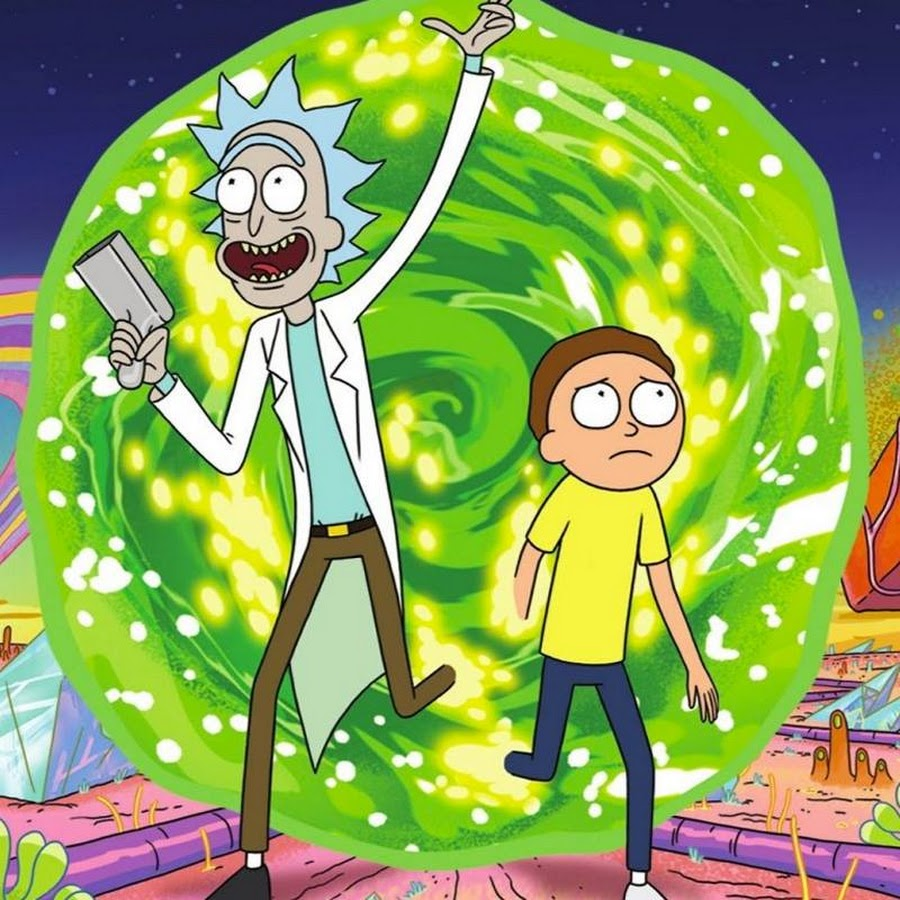

In [4]:
import os
import pandas as pd
import requests
import io

In [5]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/Aftab1995/Python-Text-Analysis/main/data/RickAndMortyScripts.csv"
download = requests.get(url).content

#Reading the downloaded content and turning it into a pandas dataframe

script = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [6]:
#script = pd.read_csv("C:\\Users\\Aftab\\Courses\\Python_Text-Analysis\\Project\\archive\\RickAndMortyScripts.csv")

In [7]:
script

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."
...,...,...,...,...,...,...
1900,2483,3,7,Tales From the Citadel,Morty,That was amazing!
1901,2484,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!
1902,2485,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...
1903,2486,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never..."


**Checking for null values in the dataset**

As shown in the plot below, there are no null values in the dataset

<AxesSubplot:>

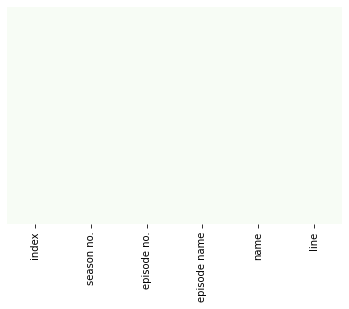

In [8]:
import seaborn as sns
sns.heatmap(script.isnull(), cmap="Greens", cbar=False, yticklabels=False)

**Number of lines by each character in the show.**

In [9]:
script.groupby(['name'])['line'].count().sort_values(ascending = False)

name
Rick                      420
Morty                     347
Beth                      148
Jerry                     132
Summer                     97
Pickle Rick                77
Supernova                  44
Cop Morty                  34
All Ricks                  32
Mr. Goldenfold             28
President                  27
Cop Rick                   26
Testicle Monster A         26
Principal Vagina           25
Cornvelious Daniel         22
Snuffles                   22
Dr. Wong                   21
Drunk Rick                 21
Agency Director            20
Alan                       19
Candidate Morty            18
Vance                      17
Scary Terry                17
Jessica                    16
Million Ants               15
All Mortys                 15
Ice-T                      13
Riq IV                     13
Morty 2                    13
All Summers                13
Alien Doctor               12
Campaign Manager Morty     12
Lizard Morty               11
Slick

**Filtering the dataset to contain the lines for the 5 main characters.** 

**Since the main characters have multiple appearances because of multiverse, all those will be clubbed as one character.**

In [10]:
filtered_script = script[script['name'].isin(["Rick","Morty","Summer","Jerry","Beth","Pickle Rick","Cop Morty","All Ricks",
                                              "Cop Rick","Morty 2","All Summers","Lizard Morty","Rick J-22","Glasses morty",
                                              "Young Rick", "Teacher Rick", "Morty 1", "Summer 1"])]

**Having a quick look at the sentiments of the characters in the overall dataset**

Here I have not filtered the character lines for any punctuation or anything. One of the reasons behind this is that since this is a script, punctuation provides meaning to the words. I believe taking out the punctuation would decrease the intensity of the emotion/sentiment demanded by the character.

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x))

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...
                              ...                        
1900    {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...
1901    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1902    {'neg': 0.123, 'neu': 0.79, 'pos': 0.087, 'com...
1903    {'neg': 0.111, 'neu': 0.838, 'pos': 0.051, 'co...
1904    {'neg': 0.478, 'neu': 0.301, 'pos': 0.221, 'co...
Name: line, Length: 1391, dtype: object

In [12]:
filtered_script['polarity_score'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
filtered_script['neutral'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
filtered_script['negative'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
filtered_script['positive'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])
del filtered_script["index"]
filtered_script

C:\Users\Aftab\AppData\Local\Temp/ipykernel_11984/2286360303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['polarity_score'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
C:\Users\Aftab\AppData\Local\Temp/ipykernel_11984/2286360303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['neutral'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
C:\Users\Aftab\AppData\Local\Temp/ipykernel_11984/2286360

,season no.,episode no.,episode name,name,line,polarity_score,neutral,negative,positive
0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...,0.0000,1.000,0.000,0.000
1,1,1,Pilot,Morty,"What, Rick? What’s going on?",0.0000,1.000,0.000,0.000
2,1,1,Pilot,Rick,"I got a surprise for you, Morty.",0.2732,0.741,0.000,0.259
3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...,0.0000,1.000,0.000,0.000
4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h...",0.2732,0.840,0.000,0.160
...,...,...,...,...,...,...,...,...,...
1900,3,7,Tales From the Citadel,Morty,That was amazing!,0.6239,0.328,0.000,0.672
1901,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!,0.0000,1.000,0.000,0.000
1902,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...,-0.0693,0.790,0.123,0.087
1903,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never...",-0.5526,0.838,0.111,0.051


In [13]:
filtered_script['sentiment']=''
filtered_script.loc[filtered_script.polarity_score>0.05,'sentiment']='Positive'
filtered_script.loc[(filtered_script.polarity_score>-0.05) & (filtered_script.polarity_score<0.05),'sentiment']='Neutral'
filtered_script.loc[filtered_script.polarity_score<-0.05,'sentiment']='Negative'

C:\Users\Aftab\AppData\Local\Temp/ipykernel_11984/3092458006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['sentiment']=''
C:\Users\Aftab\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**Grouping the dataset by character.**

In [14]:
grouped_script = filtered_script.groupby(['name'])

for name, line in grouped_script:
    print(f"First entry for {name!r}")
    print("------------------------")
    print(line.head(1), end="\n\n")

First entry for 'All Ricks'
------------------------
     season no.  episode no.      episode name       name  \
578           2            1  A Rickle in Time  All Ricks   

                                          line  polarity_score  neutral  \
578  Oh God, oh no, what did you guys just do?          0.2732    0.811   

     negative  positive sentiment  
578       0.0     0.189  Positive  

First entry for 'All Summers'
------------------------
     season no.  episode no.      episode name         name  \
580           2            1  A Rickle in Time  All Summers   

                        line  polarity_score  neutral  negative  positive  \
580  Wait, what am I saying?             0.0      1.0       0.0       0.0   

    sentiment  
580   Neutral  

First entry for 'Beth'
------------------------
    season no.  episode no. episode name  name  \
39           1            1        Pilot  Beth   

                                                 line  polarity_score  \
39  Mort

In [15]:
grouped_script.head()

,season no.,episode no.,episode name,name,line,polarity_score,neutral,negative,positive,sentiment
0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...,0.0000,1.000,0.000,0.000,Neutral
1,1,1,Pilot,Morty,"What, Rick? What’s going on?",0.0000,1.000,0.000,0.000,Neutral
2,1,1,Pilot,Rick,"I got a surprise for you, Morty.",0.2732,0.741,0.000,0.259,Positive
3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...,0.0000,1.000,0.000,0.000,Neutral
4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h...",0.2732,0.840,0.000,0.160,Positive
...,...,...,...,...,...,...,...,...,...,...
1814,3,7,Tales From the Citadel,Rick J-22,"Your life is a lie, man. All your lives are l...",-0.2325,0.877,0.074,0.049,Negative
1815,3,7,Tales From the Citadel,Rick J-22,"I-I-I want a portal gun. Unregistered, untrace...",-0.8525,0.544,0.402,0.054,Negative
1839,3,7,Tales From the Citadel,Lizard Morty,Almost... got it...,0.0000,1.000,0.000,0.000,Neutral
1869,3,7,Tales From the Citadel,Rick J-22,"A bad place, but you're going to a better one ...",0.3818,0.596,0.149,0.255,Positive


**A quick visualization of the number of positive, negative, and neutral lines by each of the main characters.**

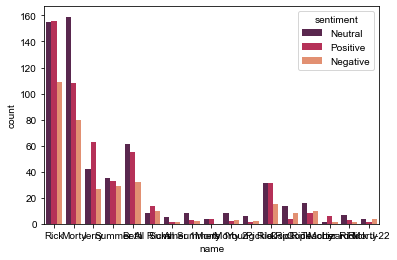

In [16]:
sns.countplot(x='name', hue="sentiment", data=filtered_script, palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

**As shown by the plot above,, the main 5 characters have the most lines. But if we drill down into their sentiments, we can verify that Jerry for sure is mostly positive and useless as per the show. Looking at the negativity bar for Rick, it is no doubt the highest since he is a cynical mad scientist. Followed by Morty, who mostly obeys his grandfather over their adventures. A shout out to Pickle Rick, one of my favorite episodes, where the scientist turns himself into a helpless pickle to prove his might. He was definitely very positive and badass throughout the episode as he builds himself a full body armour by killing sewer rats and cockroaches while being a pickle. Moreover, Rick J-22 is definitely inclined towards negative sentiment as he hijacked the main source happiness of a waffle factory and threatened to kill it.**

**Now comparing the character's sentiments across the 3 seasons**

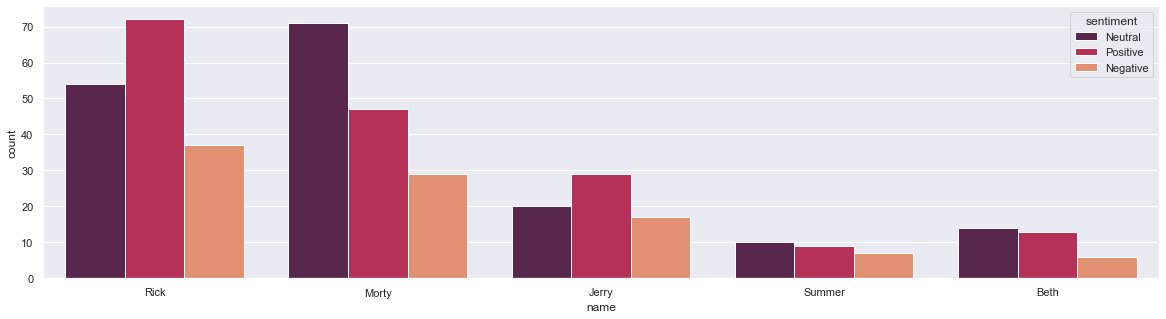

In [17]:
## Season 1
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==1], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

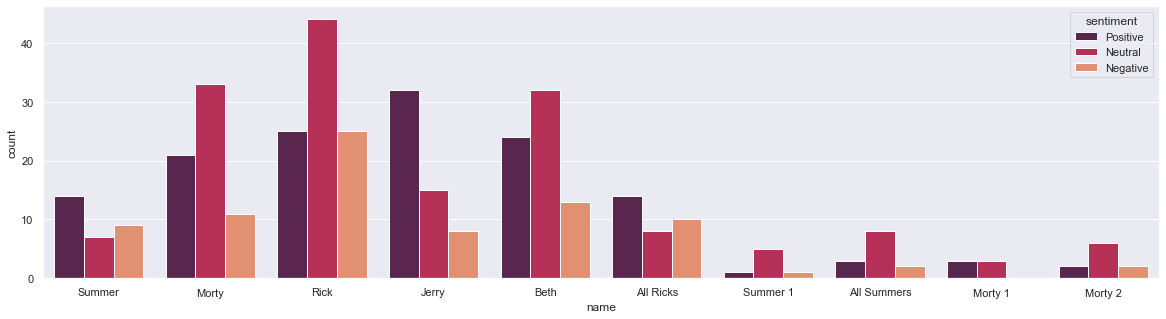

In [18]:
## Season 2
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==2], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

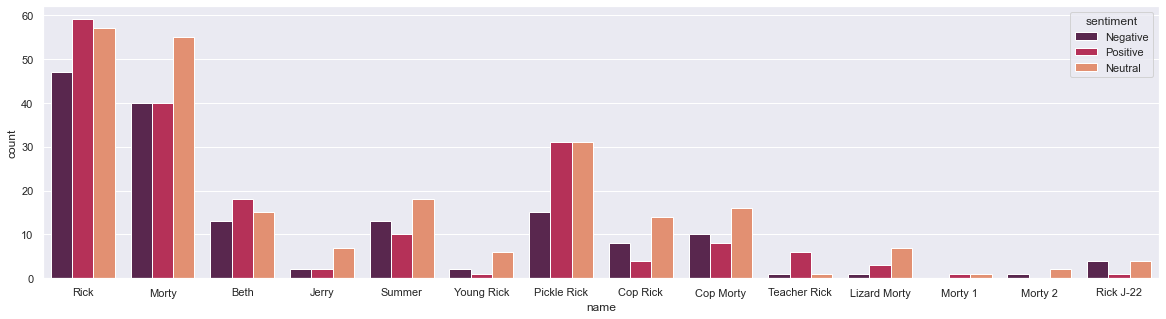

In [19]:
## Season 2
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==3], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

**In the first season, we were not introduced to the multidimensional characters that much, hence we only see the main 5 characters. The overall sentiments of the characters is also inclined towards more positive. With the progression of seasons, more versions of the main characters are introduced but the negative sentiment overall increases compared to season 1. Finally, looking at the breakdown of the third season, negativity picks up significantly. Rick pushes his grandson with negative sentimental lines while Morty pushes back as he learns that he shouldn't be scared of his grandpa. He Starts dictating terms for their adventures.**

**A visualization of the total number of neutral, positive, and negative sentiments in the script** 

<AxesSubplot:xlabel='sentiment', ylabel='count'>

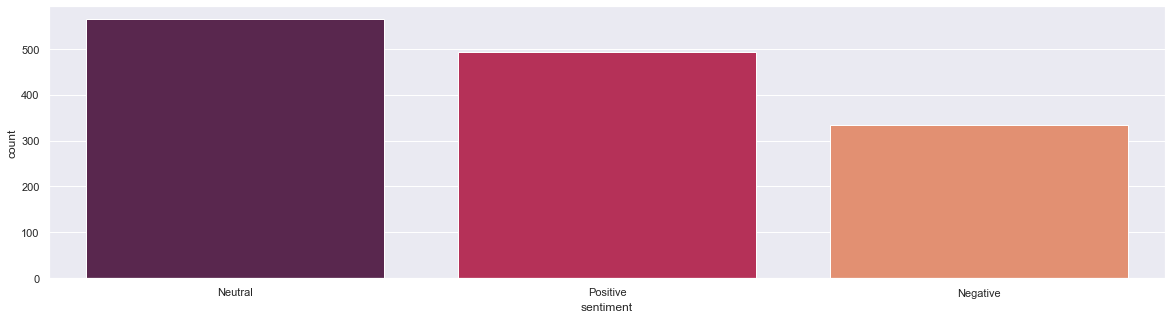

In [20]:
sns.countplot(x='sentiment', data=filtered_script, palette="rocket")

**I plotted the above figures by character, however, I would like to now see the sentiments by each season**

In [21]:
grouped_script_2 = filtered_script.groupby(['season no.'])

for name, line in grouped_script:
    print(f"First entry for {name!r}")
    print("------------------------")
    print(line.head(1), end="\n\n")

First entry for 'All Ricks'
------------------------
     season no.  episode no.      episode name       name  \
578           2            1  A Rickle in Time  All Ricks   

                                          line  polarity_score  neutral  \
578  Oh God, oh no, what did you guys just do?          0.2732    0.811   

     negative  positive sentiment  
578       0.0     0.189  Positive  

First entry for 'All Summers'
------------------------
     season no.  episode no.      episode name         name  \
580           2            1  A Rickle in Time  All Summers   

                        line  polarity_score  neutral  negative  positive  \
580  Wait, what am I saying?             0.0      1.0       0.0       0.0   

    sentiment  
580   Neutral  

First entry for 'Beth'
------------------------
    season no.  episode no. episode name  name  \
39           1            1        Pilot  Beth   

                                                 line  polarity_score  \
39  Mort

<AxesSubplot:xlabel='season no.', ylabel='count'>

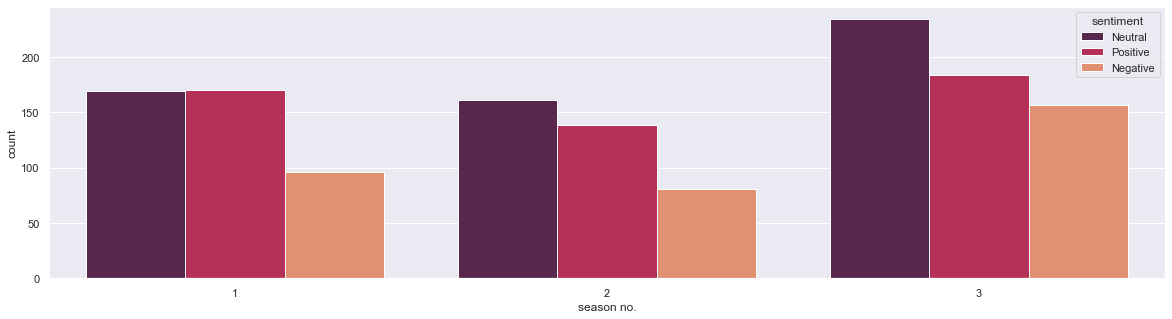

In [22]:
sns.countplot(x='season no.', hue="sentiment", data=filtered_script, palette="rocket")

**The plot above shows that the show started off on a more positive note, however, with each year, the content of the show went more towards dark comedy, which might be taken here as more negative by the vader sentiment analysis. However, so far I have been analyzing the scripts limited to the main 5 characters mentioned previously, but how does the sentiment of the season change when it is not filtered for any characters?**

<AxesSubplot:xlabel='season no.', ylabel='count'>

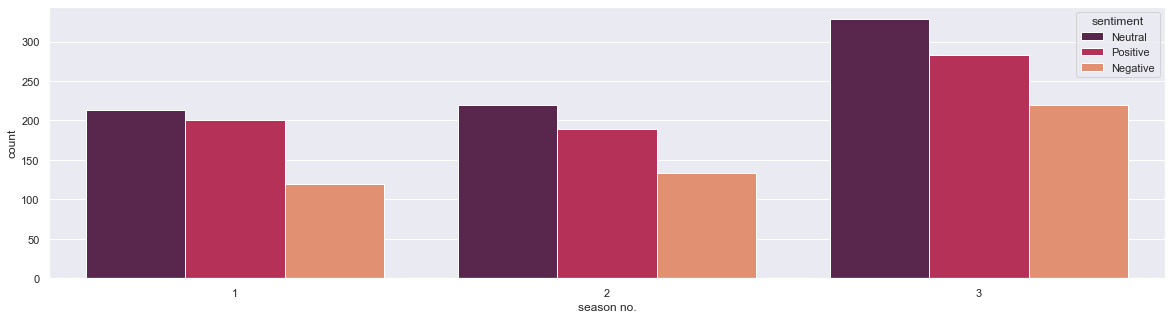

In [23]:
script['line'].apply(lambda x: sentiment.polarity_scores(x))

script['polarity_score'] = script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
script['neutral'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
script['negative'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
script['positive'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

script['sentiment']=''
script.loc[script.polarity_score>0.05,'sentiment']='Positive'
script.loc[(script.polarity_score>-0.05) & (script.polarity_score<0.05),'sentiment']='Neutral'
script.loc[script.polarity_score<-0.05,'sentiment']='Negative'

sns.countplot(x='season no.', hue="sentiment", data=script, palette="rocket")

**Looking at the above barplot it is evident that focusing on just the 5 main characters to look at the sentiment of the show was misleading. This bar plot suggests the same trend, i.e. more negativity as the show progressed. However, it might be possible to infer that the overall sentiment is driven by the main characters' lines as the ratio of positive to negative sentiment remains more or less for the above two barplots.**


### Creating Word Cloud

**Creating contractions dictionary to remove contrations from the lines.**

Reason for not using a built in library like pycontractions is because the text contains "’" instead of "'". So it doesn't recognize and and pycontractions doesn't work. Hence creating the following dictionary.

In [62]:
contractions_dict = { "ain’t": "are not","’s":" is","aren’t": "are not","what’s":"what is",
                     "can’t": "cannot","can’t’ve": "cannot have",
                     "’cause": "because","could’ve": "could have","couldn’t": "could not",
                     "couldn’t’ve": "could not have", "didn’t": "did not","doesn’t": "does not",
                     "don’t": "do not","hadn’t": "had not","hadn’t’ve": "had not have",
                     "hasn’t": "has not","haven’t": "have not","he’d": "he would",
                     "he’d’ve": "he would have","he’ll": "he will", "he’ll’ve": "he will have",
                     "how’d": "how did","how’d’y": "how do you","how’ll": "how will",
                     "I’d": "I would", "I’d’ve": "I would have","I’ll": "I will", "ill":"i will",
                     "I’ll’ve": "I will have","I’m": "I am","I’ve": "I have", "isn’t": "is not",
                     "it’d": "it would","it’d’ve": "it would have","it’ll": "it will",
                     "it’ll’ve": "it will have", "let’s": "let us","ma’am": "madam",
                     "mayn’t": "may not","might’ve": "might have","mightn’t": "might not", 
                     "mightn’t’ve": "might not have","must’ve": "must have","mustn’t": "must not",
                     "mustn’t’ve": "must not have", "needn’t": "need not",
                     "needn’t’ve": "need not have","o’clock": "of the clock","oughtn’t": "ought not",
                     "oughtn’t’ve": "ought not have","shan’t": "shall not","sha’n’t": "shall not",
                     "shan’t’ve": "shall not have","she’d": "she would","she’d’ve": "she would have",
                     "she’ll": "she will", "she’ll’ve": "she will have","should’ve": "should have",
                     "shouldn’t": "should not", "shouldn’t’ve": "should not have","so’ve": "so have",
                     "that’d": "that would","that’d’ve": "that would have", "there’d": "there would",
                     "there’d’ve": "there would have", "they’d": "they would",
                     "they’d’ve": "they would have","they’ll": "they will",
                     "they’ll’ve": "they will have", "they’re": "they are","they’ve": "they have",
                     "to’ve": "to have","wasn’t": "was not","we’d": "we would",
                     "we’d’ve": "we would have","we’ll": "we will","we’ll’ve": "we will have",
                     "we’re": "we are","we’ve": "we have", "weren’t": "were not","what’ll": "what will",
                     "what’ll’ve": "what will have","what’re": "what are", "what’ve": "what have",
                     "when’ve": "when have","where’d": "where did", "where’ve": "where have",
                     "who’ll": "who will","who’ll’ve": "who will have","who’ve": "who have",
                     "why’ve": "why have","will’ve": "will have","won’t": "will not",
                     "won’t’ve": "will not have", "would’ve": "would have","wouldn’t": "would not",
                     "wouldn’t’ve": "would not have","y’all": "you all", "y’all’d": "you all would",
                     "y’all’d’ve": "you all would have","y’all’re": "you all are",
                     "y’all’ve": "you all have", "you’d": "you would","you’d’ve": "you would have",
                     "you’ll": "you will","you’ll’ve": "you will have", "you’re": "you are",
                     "you’ve": "you have", "puti’m":"put them", "i’m":"i am", "puttin’":"putting","i’ll":"i all"}

**Finding and replacing contractions.**

In [25]:
contractions_re

re.compile(r"(ain't|'s|aren't|what’s|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

In [63]:
# Regular Expression for finding contractions:

import re

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))


# Function for expanding contractions:
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

script['line_lower'] = script['line'].apply(lambda x: x.lower())
script['text_withNo_Contractions'] = script['line_lower'].apply(lambda x: expand_contractions(x))
script[['line','text_withNo_Contractions']].head()

,line,text_withNo_Contractions
0,Morty! You gotta come on. Jus'... you gotta co...,morty! you gotta come on. jus'... you gotta co...
1,"What, Rick? What’s going on?","what, rick? what is going on?"
2,"I got a surprise for you, Morty.","i got a surprise for you, morty."
3,It's the middle of the night. What are you tal...,it's the middle of the night. what are you tal...
4,"Come on, I got a surprise for you. Come on, h...","come on, i got a surprise for you. come on, h..."


**Removing Stop Words.**

In [64]:
import nltk

from nltk.corpus import stopwords

stop = stopwords.words('english')

script['without_stop_words'] = script['text_withNo_Contractions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

script[['line','without_stop_words']].head(10)


,line,without_stop_words
0,Morty! You gotta come on. Jus'... you gotta co...,morty! gotta come on. jus'... gotta come me.
1,"What, Rick? What’s going on?","what, rick? going on?"
2,"I got a surprise for you, Morty.","got surprise you, morty."
3,It's the middle of the night. What are you tal...,middle night. talking about?
4,"Come on, I got a surprise for you. Come on, h...","come on, got surprise you. come on, hurry up."
5,Ow! Ow! You're tugging me too hard!,ow! ow! tugging hard!
6,"We gotta go, gotta get outta here, come on. Go...","gotta go, gotta get outta here, come on. got s..."
7,"What do you think of this... flying vehicle, M...","think this... flying vehicle, morty? built out..."
8,"Yeah, Rick... I-it's great. Is this the surprise?","yeah, rick... i-it's great. surprise?"
9,Morty. I had to... I had to do it. I had— I ha...,"morty. to... it. had— to— make bomb, morty. cr..."


**Removing punctuations and numbers.**

In [65]:
# Removing Punctuations
import string 

script['Text_withNo_punct'] = script['without_stop_words'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


# Removing Numbers
script['text_with_no_digits'] = script['Text_withNo_punct'].apply(lambda x: re.sub('\w*\d\w*','', x))
script[['line', 'text_with_no_digits']].head()

,line,text_with_no_digits
0,Morty! You gotta come on. Jus'... you gotta co...,morty gotta come on jus gotta come me
1,"What, Rick? What’s going on?",what rick going on
2,"I got a surprise for you, Morty.",got surprise you morty
3,It's the middle of the night. What are you tal...,middle night talking about
4,"Come on, I got a surprise for you. Come on, h...",come on got surprise you come on hurry up


**Grouping the lines by each season and then tokenizing the words.**

In [66]:
# groupping the lines by season

script_grouped = script[['text_with_no_digits',"season no."]].groupby(by="season no.").agg(lambda x: ' '.join(x))



from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')



data = cv.fit_transform(script_grouped['text_with_no_digits'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())

df.head()

C:\Users\Aftab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhh,aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhh,aaaaaaaaaaahhhhh,aaaaaaaahhhh,aaaaaaahhh,aaaaaaahhhh,aaaaaah,aaaaagh,aaaaah,...,yyou,yyoure,yyyoure,yyyouve,yyyyyyyyyyyou,zero,zipped,zit,zone,zorpathion
0,0,1,1,1,1,1,1,1,1,1,...,6,3,1,1,1,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,6,1,0,0,0,2,1,0,0,1


AttributeError: 'int' object has no attribute 'expandtabs'

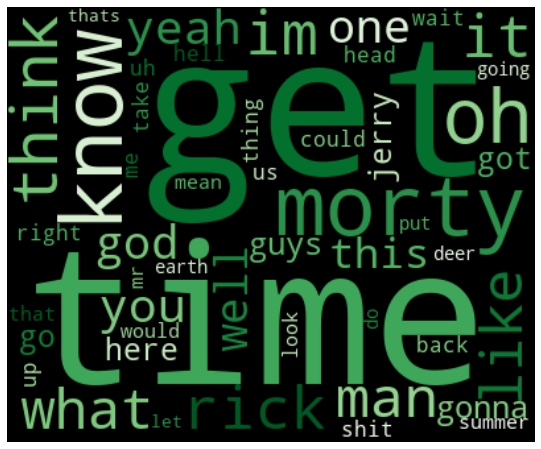

In [101]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=50,colormap="Greens").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_transpose=df.transpose()

# Plotting word cloud
generate_wordcloud(df_transpose[1].sort_values(ascending=False),product)

In [90]:
script_grouped_transpose.index

Index(['text_with_no_digits'], dtype='object')

In [68]:
script_grouped_transpose[1] = script_grouped_transpose[1].str.replace('—','')
script_grouped_transpose[2] = script_grouped_transpose[2].str.replace('—','')
script_grouped_transpose[3] = script_grouped_transpose[3].str.replace('—','')


In [69]:
# Plotting word cloud for each product
for index,product in enumerate(script_grouped_transpose.columns):
  generate_wordcloud(script_grouped_transpose[product].sort_values(ascending=False),product)

ValueError: could not convert string to float: 'morty gotta come on jus gotta come me what rick going on got surprise you morty middle night talking about come on got surprise you come on hurry up ow ow tugging hard gotta go gotta get outta here come on got surprise morty think this flying vehicle morty built outta stuff found garage yeah rick iits great surprise morty to it had to make bomb morty create bomb what bomb were gonna drop get whole fresh start morty create whole fresh start ttthats absolutely crazy come on morty take easy morty gonna good right now were gonna go pick little friend jessica jessica math class drop bomb know want somebody know want thing im gonna make like new adam eve gonna adam ohh jessicas gonna eve whhhhwha thats surprise morty no cant jessica even know exist butbut forget that cant blow humanity ii get trying say morty listen im not got yyou gotta worry trying fool around jessica mess around jessica anything im kind guy morty talking about rick youyou worry getting jessica anything shshshe she she you morty care jessica yyyyyyyyyyyou know what morty right lets forget girl altogether she probably nothing trouble anyways thats it thats it rick im taking wheel get me morty im taking charge situation buddy im puti am im im im putting ii am am gonna stand around like sort dumb dumb person lelet ruin whole world come on gotten you love earth much marry it you crazy alright alright morty alright illill land ill land ill land ill land thing land thing big tough guy sudden well park right here morty right side ree road here oh thank god know what test morty elaborate test make assertive was sure not not know yyou know what mo um see theres new episode singing show tonight guys think gonna best singer oh god head food im going puke morty getting sick told practicekiss living room pi willow dog sleeps it kissing pi willow mom get lot sleep last night maybe dreams loud something maybe night grandpa rick what dad what everyones supposed sleep every single night now realize nighttime makes half time damn it jerry beth oh god parents loud want die mm god summer gotta rip bandaid now thank later okay due respect rick talking about respect due son supposed pass classes keep dragging highconcept scifi rigamarole listen jerry iii want overstep bounds anything house world real julius caesar ill tell somethingtell feel school jerry waste time buncha people running around bumping other gguy front says two plus two people back say four thethen bell rings give carton milk piece paper says go take dump something mean place smart people jerry know thats popular opinion two cents issue good breakfast beth really made crap eggs wish mother eat them oh dad… what real alright now everybody get settled get away windows now look were gonna dealing real serious stuff today might heard it called math without it none us would even exist lets jump right in two plus two jessica five plus five jessica okay good time quiz yeah know what aw bad tough first row take one pass back me stakes high room theres crucial things happening every day people getting smarter yall getting dumber yall aint gonna see  hi morty whoa hi jessica show you wow ththeyre great thank you know named these little morties uh thats flattering little weird know want them rename them squeeze them manhandle them give business see shuffle them mean really get knock around wrong answers wow well okay jessica llets give shot mm oh morty me uh iim best morty me ah jessica morty jessica five minutes this im gonna get mad jejessica jessica fault happening uh morning frank oh geez frank know knife necessary mean know yyou kind things handled without it are morty listen me got errand run whole different dimension need extra pair hands oh geez rick wwwhatd frank pretty obvious morty froze him listen need help morty mean got got get get hell go take care business important come on morty know rick cant leave school again concept much higher stakes get there morty think myself come on aw geez okay guess skip history frank mean unfreeze him ill later morty hell fine lets go hi frank aaaaaaaaaaahhhhh scalpel knock knock jerry manager gave hour lunch thought hey swing wife works jerry please tell incredibly urgent reason well lunch mean one three meals existed mi willennia okay ask jerry because know job involves performing heart surgery well yeah horses excuse me okay lets rehash fight sense busy wi way whoa floor kind literature really nicelooking nursing home hey honey crazy idea bad pitch lets put dad here lets put dad nursing home hey tom know were losing him hear beeps is right come on morty lets go oh geez okay oh man rick place dimension  got perfect climate conditions special type tree morty called mega tree theres fruit trees theres seeds fruits im talking mega seeds theyre theyre incredibly powerful need help research morty oh man rick im looking around place im starting work anxiety whole thing right right calm down listen me morty know new situations intimidating looking around scary different but know mmeeting head on charging right like bull thats grow people im stranger scary situations deal time now stick me morty were gonna be holy crap morty run never seen thing life even know hell is got get here morty gonna ki us were gonna die were gonna die morty oh morty take deep breath breathe breathe fresh air in morty yyou smell that thats smell adventure morty thats thats smell ofofofof whole different evolutionary timeline right rick look much longer gonna be back school now joking me mean look crazy crap surrounding us look thing right there hell thing think gonna see kind thing school look lumbering around defies logic thing yeah rick get it were surrounded monsters thats kind reason want leave tatatatatata morty see this see stumbled upon morty idea there mega trees thats right morty mega trees mega fruit thats im talking about morty thats seeds are would done wanted would never found them love school right right so whats special seeds anyways ask lot questions morty charismatic makes kind under underfoot figure take shoes morty theyre special grappling shoes wearing things babies basically walk surface want morty up down below turn around left things really bring together aaaaaaahhhh turn on morty shoes turned on putting father home came back life want grab stuff mattress like last months victorias secret told ordering something valentines day importantly father horrible influence son fine davin since were fighting ever affair guy wi come hotel room blow brains naked bodies look appreciate stress under morty trouble school way dad moved in influence see rick that first time life morty friend well maybe right uh yeah maybe am im fathers daughter im smart think im heart surgeon ahem horse heart surgeon hello mrs smith principal vagina relation wonder mortys father might able chat afternoon morty oh really ddid number legs right now know got turn shoes on morty work yeah look turned mine on problem getting here leisurely breeze im lot pain rick yeah see that think sti able help collect seeds morty kidding me thats it rick thats last straw cant believe this im sitting legs broken sti asking getting seeds ooh ow oh yyyoure monster yyoure like hitler butbut even hitler cared germany something okay hold second morty ooh ohh ooh hnngh hoo ooh ohh aaaaagh oooooh ooh ohh ooh wow rick stuff healed broken legs instantly mean ive never felt good life thank you worry it morty come help get seeds right buddy sure thing rick asked morty happened went future dimension advanced medicine brokenleg serum every corner drugstore stuff place morty wow thats pretty crazy rick theres one problem morty one little hangup dimension visited advanced also halted aging process everyone young morty forever old person there morty like sort of know celebrity walking around ii fascinating them lot attractive women there morty theytheythey wanted time me lot fun lot young ladies spent much time there interdimensional portal device got charge left morty got charge left what good garbage morty gonna work anymore morty oh geez rick thats good wwhat gonna do ii back school right now gonna get back home theres ways get back home morty gonna little bit hassle were gonna go interdimensional customs gonna real solid uhoh get customs im gonna need take seeds bathroom im gonna need put way inside butthole morty butt put way inside there far fit oh geez rick really want that well somebodys got it morty ththese seeds gonna get customs unless theyre someones rectum morty uuuh theyll fall right mine ive done many times morty mean young yyyouve got whole life ahead you anal cavity sti taut yet malleable got grandpa morty y got put seeds inside butt butt come on morty please morty it morty oh man fact is son morty attended school total seven hours last two months what notify us done notifying you getting messages ive leaving mortys grandfather boom told you face ruining child wait celebrating yeah see thought something fishy there usually mortys grandpa thats taking school summer kind god lets happen little incident student frozen death theres evidence latino student it everyone wants take racial place let them glarp zone flarping unglarping only glarp zone flarping unglarping only like here morty cant abide bureaucracy like told go do consider violation get seeds way butt yeah rick lets get with okay mean things pointy hurt means theyre good ones good kid morty mega seeds super valuable work huge help me im gonna able a go there new new machine run morty run aaaaaah ohhhhh ohhhhhh aaaaah think it ooh oh nice morty student becomes teacher whoooooo need type coordinates home world morty cover me oh man mean know ii want shoot nobody theyre robots morty okay shoot them theyre robots theyre robots rick figure speech morty theyre bureaucrats respect them keep shooting morty idea prison like here holy crap insane come on morty got get hell here wow come cafeteria portal uh yeah well know mymy ferraris shop kidding morty right yeah get number later come on morty got get here got get seeds ass oh look honey son albert eindouche what im angry father improviser oh hi jerry oh goodness morty class talked this youryour parents disappointed inin behavior no takers guys really touching stuff beyond reasoning beyond reasoning takes one know one dad could make son miss entire semester school mean like hes hot girl cant bail life set shop someone elses guys stuff were moving nursing home nursing home you nuts im genius build robots fun well build baskets watch paul newman movies vhs mentally scar boy scouts every christmas mean personal dad mom come on rick needed help all morty stay this obviously capable judging situations own trying say morty hes stupid something oh highroad us dad know fully well morty last child needs missing classes iii know mean that little bit specific oh crying outhes got kind disability something want us say do well duh doy son look love you morty know fast kids want compete world got work twice hard aw geez dad yyou know thats lot drop kid once morty ttell parents square root pi oh come on rick know cant square root pi morty go  whoa hell holy crap hes right morty tell parents first law thermodynamics the increment internal energy system equal increment heat supplied system wow im smart but told school stupid learn things mortys gifted child special mind thats hes little helper hes like me hes gonna great science stuff later life hes smart school needs keep hanging helping me jerry want whatevers happening stop no ii understand uh maybe overreacted keep going school okay jerry drive hard bargain supposed do say no youyou really wear pants around here want know us on gonna clear communication frank palicky frozen death today idea talking about okay well uh morty bedtime hour stay night again good though work think family now beth me would love you know what okay holy cow rick know hanging making smarter full disclosure morty not temporary superintelligence side effect mega seeds dissolving rectal cavity aw man yeah seeds wear off gonna lose motor ski wills also gonna lose significant amount brain functionality  hours morty ohh man oh geez ohh im sorry morty bummer reality dumb come needed seeds real bad give get parents back were gonna go get adventures were gonna go even adventures that morty gonna keep mouth shut it morty world full idiots understand whats important theyll tear us apart morty stick me im gonna accomplish great things morty gonna part them together were gonna run around morty were gonna kinds wonderful things morty me morty outside world enemy morty were friends weve got morty rick morty rick morty adventures morty rick morty forever forever mortys things rick morty running around rick morty time day long forever hundred days rick morty forever  times over rickandmortyadventurescom  years every minute rickandmortycom what looking me want go outside outside outside kidding me come on oh god whats wrong idiot dog oh mean it dad you snuffles good boy praise now morty peed carpet bad dog bad morty come on need help tonight hey wait hold second rick chance sort crazy science thing could whip might help make dog little smarter would you thought whole point dog feel superior jerry you pull thread come on morty listen rick gonna stay rentfree use son stupid science least could put little bit use family make dog smart mortys grounded haha aw man boy really got wall time jerry right ruffles whats name snuffles snuffles shake roll over go bathroom holy crap way yeah top game now jerry fun come on morty fantastic rick yeah morty like that boy really going flip lid one wwwwhat it device morty put ear enter peoples dreams morty like movie keep crowing about talking inception thats right morty gonna lot like that except know gonna maybe make sense inception made sense try impress me morty listen tonight were gonna go home math teacher mr goldenfold were gonna incept idea brain give as math morty way can know yyoure gonna help science morty time geez rick time took make thing just know helped homework listening me morty homework stupid whole point get less it come on lets get deal thing wwere gonna incept teacher frustrating me know me  nice mrs pancakes real nice know me uhoh spoilers im full season behind wow rick cant believe were sitting around standing around mr goldenfolds house really weird get whole lot weirder morty wheat thins wheat thins ill take two oh think enough sir right morty time make move make bounce no didnt oh jiggle now better stop that allahu akbar were gonna take control plane were gonna  unless morty smith gets better grades math hey said nobody move buddy names buddy goldenfold nice wheat you take cover morty aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhh ooohhh goldenfolds got control anticipated mean guy teaches highschool math take active dreamer weve got take wakes up morty cant get ki willed get ki willed someone elses dream die real morty what kidding me ohhhhhh baby avoid getting shot real life time morty thing here well fine bring slippers now footstool snuffles im talking about dog said thing equally sarcastically wedding guess what ooowwwwowowwaawaa oh god hes trying tell us something awesome aaaawwaaaaawaawa aw hes saying i love lasagna ooooyayawawa hes saying i love obama cute im posting online like right now call bob saget sti thing hmm goldenfold were coming out want talk were rational adults want anything bad happen human shield mrs pancakes aaaaaaaahhhh oh no morty subconscious panicking whoa whoa whoa whoooooaaaa whoa whoa whoooooaaaa whooooa whoooooooa whoa whooooooooaaaaa aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhh relax morty look mrs pancakes parachute come on hey know me oh no rick look goldenfold landed plane hes created mechanical arm pluck mrs pancakes air lets us fall  giant vat lava pretty concise morty looks like weve merely prolonged inevitable thats it morty prolonging inevitable listen go mrs pancakes dream everything wi go  times slower morty buy us time figure out know m right lets go oh man rick pretty weird judge morty okay right well look mrs pancakes right there ill go ask tell goldenfold ki us wakes up whoa whoa morty trick incepting making people think came idea listen me were gonna incept mrs pancakes blend ill talk lunch ooh oh oh man im sorry no no no thanks no im okay whoa hey there stranger think things ohh oh gross gross whoa whoa whoa whats matter you morty calm down kind ki willing vibe here summer aw geez blame him come on old man little boy lets make intergenerational sandwich time go another dream deep morty hell would mr goldenfolds dream version mrs geez know morty whawhat want me welcome nightmare bitch raaaaawwwrrr oh go ooooooohhhhh holy crap looks like sort legally safe knockoff  horror character miniature swords fingers instead knives im scary terry run cant hide bitch whoa hey buddy got going there snuffles fix make better humans understand snuffles now awesome snuffles want understood snuffles need understood okay yeah get beth talking about funs over whoa dad cant like endow creature sentience rip away not know indian giving aw oh god recognizes dogs tv holy crap escape someone elses dreams morty oh man oh man oh man little girl huh kidding me again oh man looks like weve hit dream bedrock here morty oh geez rick wwwhoa good nothing fear out bitch ohhhh holy crap morty travel dreams travel dreams were screwed testicles summer  testicles summer removed gone call that snuffles slave name shall call snowball fur pretty white okay snowball calm down okay scaring me scaring you aaaaaaahhh tell me summer human born stumpy legs would breed another deformed human put children display like dachshund uhhh  hey oh wow okay everything okay here jerry come rub face urine again yeah totally lets go wi walk time walk again incepting were trying incept were trying incept get a math oh yeah buckle up bitch ooooooaaahhh man sure says bitch lot run cant hide bitch hold on morty yyou know what keeps saying run hide say try hiding thats opposite what yeah well since taking guys advice anything hey know what got really good point there rick like truth could hide like hed sharing information us know iii think good idea rick worstcase scenario were back running wow know what mean looks like could hid whole time boy rick good thinking thanks morty yeah nice page every while run cant hide oh perfect morty look that hes getting sleepy little bit longer calls day thats make move snuffles mean harm huge misunderstanding dad wants called snowball well im calling that thats ridiculous aggressive jerry perhaps tomorrow dr scraps wi solve problem bit surgery huh think control haircut want talk it yeah know know take anger scary brandon love you melissa morty perfect little scary coitus fast asleep well incept him looks like scary terrys nightmare oh boy rick imagine horrible things must know scare scary terry oh no im late class bitch oh no im wearing pants oh uh um  bitch yeah bunch bullcrap cares stupid pun make ki someone let poor guy say whatever wants putting much pressure yourself scary terry know mean yyoure perfectly scary enough is hey yo scary t even trip pants dawg heres pair us fool aww bitch know say need say anything got you dawg boy dawg even trip oh hey guys guys ever need anything say word matter fact terry something could help us with always hated song halves belong together bitch sex sacred give morty smith good grades bitch holy crap god damn know one thing sure im giving morty a math thats idea original thought hell frying pan dot dot dot huh morty oh man whats going on well possible dog became selfaware made modifications cognition amplifier turned jerry beth summer learning humanitys cruel subjugation species guess good mine morty cant believe mean snuffles got hes smart choose get cs psst beth jerry summer  dad  rick hurry set camp sewer tunnel something dogs completely take over whoa whoa whoa were going anywhere house im abandoning it over jerry dogs path total world domination but hey least know piss carpet right wait minute idea gentlemen moment time see that im peeing special guns means them bad person bad ooh great plan jerry bring boy me always kind me morty thats wi leave testicles on wi best friend live side ththanks snuffles begin phase two mmm thank you fido rick thought dead no no no playing dead good news though morty whole things gonna really soon what dream morty were dogs dream night dogs captured us cried crapped pants went sleep used dream inceptors put two us inside snuffles dream iits like whole year six hours dreams move one onehundredth speed reality dog time oneseventh human time so know every day like minute like inception morty confusing stupid everyones favorite movie aw man really liked life well least really crap pants no no happened went sleep morty sleeping crap right now things happened you real thing that know crapped pants mean mess there got hands morty got dream inceptor piece fell mouth aw man geez seriously look ddddont worry it morty here take these morty take these pi wills supposed wake up something close gonna make kidneys shut down what necessary plan morty even trip dawg anything anything precious morty hell kingdom bean counter would trade humans health happiness them them taking humans world wi lead nothing heartbreak cruelty instead wi go new world colonize society intelligent dogs one wi make mistakes humanity one pet insurance wi mandatory im gonna miss you snowball call snuffles morty im going miss you too much jerry im sorry like end old yeller oh jerry mean dogs it wow whole world populated intelligent dogs wonder itll like rick think wi great morty know could developed ininto satisfying project people ages mean id watch it morty least  minutes pop know maymaybe theyll boarddriven know thats real comforting idea rick know morty know oooh dream bitch principal vagina here let name fool you im much charge reminding tonight annual flu season dance know many times say flu stay home flu season dance awareness celebration bring dead babies passover ohhh okay go hheyy jessica ughh whats morty ugghh doing ummm wait wait talk her well mean thinking it dude stay league look hot is see going bigger school wealthier district hittin prettiest girl gee thanks brad throw balls far want good words date languager eh try worry it morty good kid theres premium right now getting girls sometime brads shape missing point dad want girls want jessica ahhh well remember feeling way young lady named mom thats urban dis mom jessica remember first time saw her thought get pregnant shell marry me beg pardon rick inappropriate sorry please proceed story banging daughter high school im sure want take romantic advice guy morty marriage hanging thread marriage fine thank you jerry house whatever say is think blind man could see beth looking door barely reason care even noticed come on rick talk parents like that listen morty hate break you people call love chemical reaction compels animals breed hits hard morty slowly fades leaving stranded failing marriage it parents gonna it break cycle morty rise above focus science alright well im gonna go get dressed dance yeah im going tocheck mom morty hand screwdriver huh im almost finished making ionic defibulizer morty gonna great hey listen rick know said that know love chemical stuff earlier well thinkn know www could make sort chemical thing happen inside jessicas mind know falls love sort thing know like maybe make sort love potion something morty thats poor use time beneath me hand screwdriver know what rick im gonna hand screwdriver uh im never gonna hand anything ever again rick im always helping thing wwwwhat me rick www cant help once once once growing fast morty growing real big thorn straight ass listen called oxytocin extracted vole know vole is morty know vole is a rodent mates life morty chemical release mammals brain that makes fall love alright morty gotta combine dna oh well okay hair morty need one hairs game thrones oww alright morty whoever smear stuff wi fall love you you forever ya happy now morty heck yeah thank you grandpa rick hey theres dangers anything side effects right www i hack go nuts morty full proof ugh unless flu beth sti love me want kinda question that yes no kind jerry want homeless people homes yess gonna build them noo good yes wait iii loving house homeless people loving work jerry hard work like building homeless shelter nobody want say no it people put work in ya say see working here conversation seem tedious me sort of obviously sort love you i stop asking maybe ill love more crap need horse hospital late racetrack starlit derby theres seven horse collision davins alone hey there jessica whooawhoopsie omigod morty look really nice tonight wow thanks love you morty love much burns oh man love too jessica punk bothering you jessica leave alone jerk im love him hes man wi ever be aw man morty ugh im really sorry oh well problem brad theres somethin special bout you somethin special whoa take easy get hands him back im trying man thats enough bradley want injuring ballthrowing arm oh principal vagina never leave me morty never uh sure mean course not think about cares hold me let go love morty gonna alone guy night yeah dad digging around inside horses romantic setting'